Khởi tạo các thư viện

In [1]:
import yfinance as yf 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('dark_background') #Style biểu đồ
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


Khởi tạo time và đọc dữ liệu

In [2]:
end = datetime.now() #Kết thúc lúc hiện tại
start = datetime(end.year-3, end.month, end.day) #Bắt đầu lúc 10 năm trước

Công ty mẫu: Google

In [3]:
company = "GOOG" #ID trên yahoo finance
company_data = yf.download(company, start, end)
company_data.round(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-19,114.60,115.92,114.39,115.12,115.12,24688000
2021-04-20,115.39,115.48,113.59,114.68,114.68,21774000
2021-04-21,114.26,114.77,112.93,114.66,114.66,23930000
2021-04-22,114.66,115.19,112.82,113.40,113.40,21096000
2021-04-23,114.17,116.29,113.91,115.76,115.76,28670000
...,...,...,...,...,...,...
2024-04-12,159.40,161.70,158.60,159.19,159.19,16968200
2024-04-15,160.28,160.83,156.15,156.33,156.33,21140900
2024-04-16,155.64,157.23,155.05,156.00,156.00,15413200


Mô tả dữ liệu

In [4]:
company_data.shape #Kích thước gồm 2517 dòng và 6 cột tương ứng với 6 giá trị, các giá trị ở phần dưới 

(756, 6)

In [5]:
company_data.head()
#Open: Giá mà tài sản tài chính được giao dịch lần đầu trong ngày giao dịch. Đây là giá cả đầu tiên mà người mua và người bán đồng ý trong ngày đó.
#High: Giá cao nhất là giá cao nhất mà tài sản tài chính đạt được trong suốt khoảng thời gian giao dịch được xem xét, thường là trong một ngày giao dịch.
#Low: Giá thấp nhất là giá thấp nhất mà tài sản tài chính đạt được trong suốt khoảng thời gian giao dịch được xem xét, thường là trong một ngày giao dịch.
#Close:  Giá đóng cửa là giá cuối cùng mà tài sản tài chính được giao dịch trong một ngày giao dịch. Đây là giá cuối cùng mà người mua và người bán đồng ý trước khi thị trường đóng cửa.
#Adj Close: Giá đóng cửa điều chỉnh là giá đóng cửa được điều chỉnh để tính toán các yếu tố bổ sung như chia cổ tức, chia tách cổ phiếu hoặc cổ phiếu quyền chọn. Điều này giúp cho việc so sánh giá cổ phiếu qua các thời kỳ không bị ảnh hưởng bởi các biến động về cơ bản.
#Volume: Là số lượng tài sản được giao dịch trong một ngày giao dịch.   

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-19,114.598999,115.922501,114.392250,115.120003,115.120003,24688000
2021-04-20,115.394501,115.480003,113.585503,114.681503,114.681503,21774000
2021-04-21,114.262497,114.765999,112.928497,114.664497,114.664497,23930000
2021-04-22,114.661499,115.188103,112.822502,113.396004,113.396004,21096000
2021-04-23,114.173500,116.291000,113.910500,115.764999,115.764999,28670000


In [6]:
company_data.info() #Định dạng kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2021-04-19 to 2024-04-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [7]:
company_data.describe() #Mô tả

,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,124.462295,125.897634,123.171658,124.548569,124.548569,2.561424e+07
std,17.903147,17.838321,17.860020,17.854443,17.854443,1.023440e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,110.814497,112.617500,109.128189,111.161377,111.161377,1.895650e+07
50%,127.658249,129.800003,126.411503,127.425999,127.425999,2.300035e+07
75%,138.986565,140.000000,137.527622,138.834377,138.834377,2.931980e+07
max,160.279999,161.699997,158.600006,160.789993,160.789993,9.779860e+07


In [8]:
data = company_data.filter(['Adj Close'])
data

,Adj Close
Date,
2021-04-19,115.120003
2021-04-20,114.681503
2021-04-21,114.664497
2021-04-22,113.396004
2021-04-23,115.764999
...,...
2024-04-12,159.190002
2024-04-15,156.330002
2024-04-16,156.000000


Tiền xử lý dữ liệu

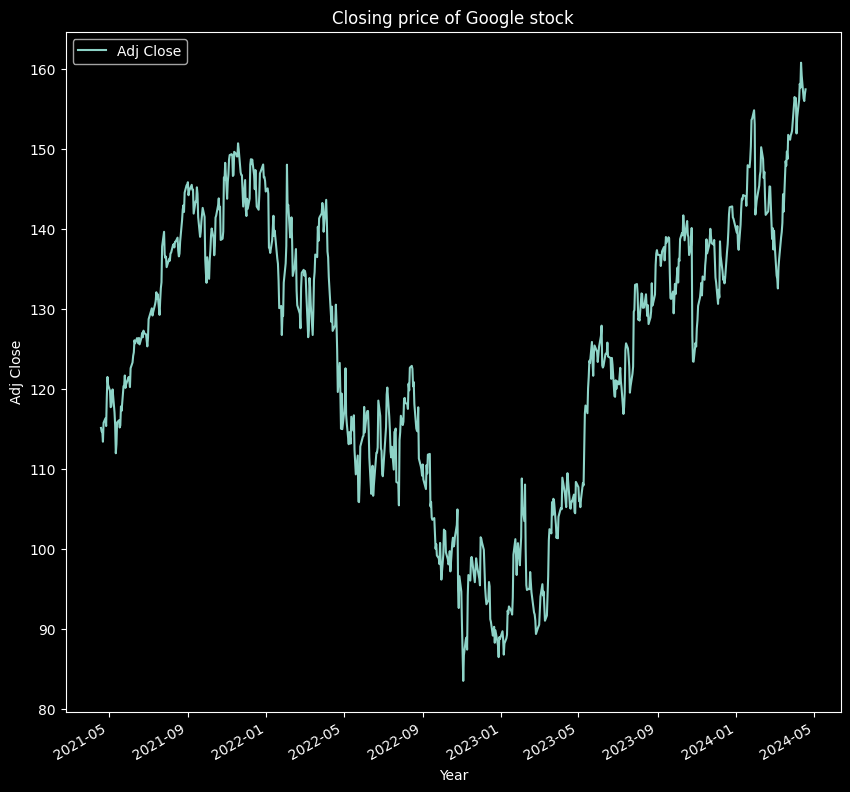

In [9]:
plt.figure(figsize=(10, 10))
company_data['Adj Close'].plot()
plt.xlabel("Year")
plt.ylabel("Adj Close")
plt.title("Closing price of Google stock")
plt.legend()
plt.show()

Chuẩn bị dữ liệu

In [10]:
#Chia tỉ lệ giá cổ phiếu.
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))
scaler_data
len(scaler_data)

756

Chuẩn bị dữ liệu ---> Training model

Tạo x_train và y_train.
x_train: chứa tập giá trị của 30 ngày liên tiếp
y_train: chứa giá trị của các ngày tiếp theo
* Lưu ý: 60 là khoảng thời gian để suy luận và dự đoán giá cổ phiếu. Lấy số liệu từ 3 tháng vì chia ra theo các quý sẽ ổn định hơn...(kinh nghiệm cá nhân >^<)

In [11]:
x_train = []
y_train = []
for i in range(30, len(scaler_data)):
    x_train.append(scaler_data[i-30:i])
    y_train.append(scaler_data[i])
x_train, y_train = np.array(x_train), np.array(y_train) #Chuyển sang np

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #Thay đổi hình dạng, từ array gộp về chuỗi
x_train.shape

(726, 30, 1)

Xây dựng model

In [12]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1))) # 100 neurons
model.add(Dropout(0.5)) #Chọn 50% để vô hiệu hóa, tránh trường hợp bị overfitting
model.add(LSTM(50,return_sequences=False)) #tiếp tục với 50 neurons
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=80)


Epoch 1/80


c:\VISUAL STUIDO CODE\Stock_predict\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1225
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0159
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0106
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124
Epoch 12/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118
Epoch 13/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109
Epoch 14/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109
Epoch 15/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102
Epoch 16/80
23/

In [13]:
model.save('model.h5')